# Machine Learning Explainability - Titanic example

In [8]:
import pandas as pd
import numpy as np
import eli5
import pdpbox
import shap

from explainer import explainer

## Reading and preprocessing data

In [9]:
df = pd.read_csv('titanic.csv')
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


## Fitting model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Y = df.Survived
X = df.drop('Survived', axis=1)
X['Age'] = X.Age.fillna(X.Age.mean())
X['Sex'] = X.Sex.apply(lambda sex: int(sex == 'female'))

# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [11]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)  

RandomForestRegressor()

# Permutation Importance

In [15]:
pi=explainer.PermImpExplainer(rf,X,Y)
pi.fit()
pi.plot_PIweights()

Weight,Feature
0.7712 ± 0.1207,Sex
0.4785 ± 0.0307,Age
0.3764 ± 0.0275,Fare
0.3450 ± 0.0160,Pclass
0.0983 ± 0.0118,SibSp
0.0350 ± 0.0038,Parch


### Интерпретация Permutation Importance

Признаки сверху – наиболее важные, снизу – наименее. Для этого примера, самым важным признаком был пол пассажира.
Число после ± отражает, как производительность изменялась от одной перестановки к другой.
Некоторые веса могут быть отрицательны. Это связано с тем, что в этих случаях прогнозы по перетасованным данным оказались более точными, чем реальные данные.

# Partial Dependence

In [16]:
pdp_exp = explainer.PdExplainer(rf,X_train,X_train.columns.to_list(),['Age','Pclass','Sex'])
pdp_exp.fit(fit_pairs=True)

Fitted features:
['Age', 'Pclass', 'Sex']
Fitted pairs:
[('Age', 'Pclass'), ('Age', 'Sex'), ('Pclass', 'Sex')]


(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='Age'>})

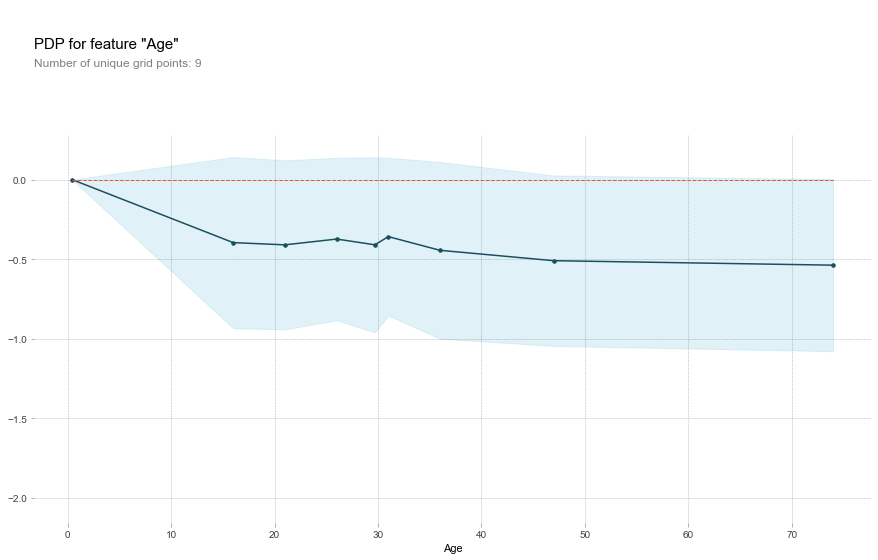

In [17]:
pdp_exp.plot_pdp('Age')

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_inter_ax': <AxesSubplot:xlabel='Age', ylabel='Pclass'>})

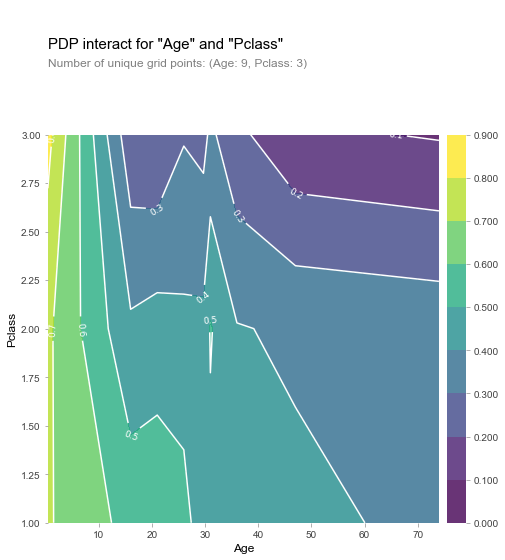

In [18]:
pdp_exp.plot_pdp_pair(pair_name = ('Age', 'Pclass'))

### Интерпретация Partial Dependence

Этот метод берет строку набора данных и многократно изменяет значение для одного объекта. Это делается несколько раз с разными строками, а затем агрегируется, чтобы выяснить, как признак влияет на таргет в широком диапазоне. Мы также можем визуализировать частичную зависимость двух признаков одновременно, используя 2D графики.

# SHAP Values

In [21]:
shp = explainer.ShapExplainer(rf,X_test)
shp.fit()

Using 179 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 179/179 [00:19<00:00,  9.06it/s]


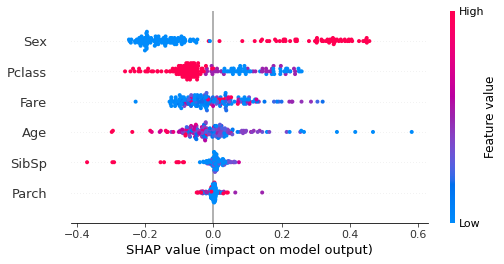

In [22]:
shp.plot_shap_summary()

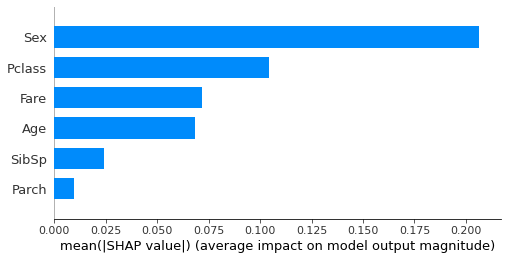

In [23]:
shp.plot_shap_importance()

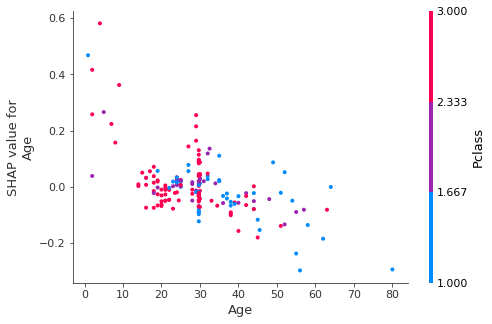

In [24]:
shp.plot_shap_dependence('Age')

In [25]:
shp.plot_shap_force(idx=0)